In [43]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D

Определяем символьную переменную и функцию.

In [19]:
x = sp.symbols('x')
f = 3 * x ** 2

Вычисляем производную.

In [13]:
df = sp.diff(f, x)

Конвертируем выражения SymPy в функции, чтобы их можно было использовать с числовыми значениями.

In [21]:
f_func = sp.lambdify(x, f, 'numpy')
df_func = sp.lambdify(x, df, 'numpy')

Настройки градиентного спуска.

In [22]:
x0 = 5
learning_rate = 0.1
res = []

Градиентный спуск

In [25]:
while True:
    res.append((x0, f_func(x0)))
    x1 = x0 - learning_rate * df_func(x0)
    if np.linalg.norm(x0 - x1) <= 0.00000001:
        break
    x0 = x1

Построение графика

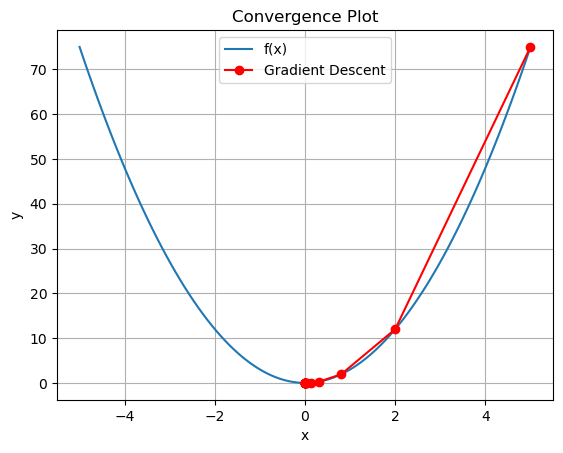

In [27]:
x_values, y_values = zip(*res)
plt.plot(np.linspace(-5, 5, 100), f_func(np.linspace(-5, 5, 100)), label='f(x)')
plt.plot(x_values, y_values, 'ro-', label='Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Convergence Plot')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
y = sp.symbols('y')
f_2 = 3 * x ** 2 + 5 * y ** 2

Вычислим градиент

In [49]:
grad = [sp.diff(f, var) for var in (x, y)]
gradient = sp.lambdify((x, y), grad, 'numpy')

Настройки градиентного спуска

In [51]:
x0 = np.array([5, 10])
learning_rate = 0.1
res = []

Градиентный спуск

In [52]:
while True:
    res.append(np.append(x0, f.subs({x: x0[0], y: x0[1]})))
    grad_values = gradient(*x0)
    x1 = x0 - learning_rate * np.array(grad_values)
    if np.linalg.norm(x1 - x0) <= 0.00000001:
        break
    x0 = x1

Преобразуем результаты в массив NumPy

In [54]:
res = np.array(res)

Построение трехмерного графика

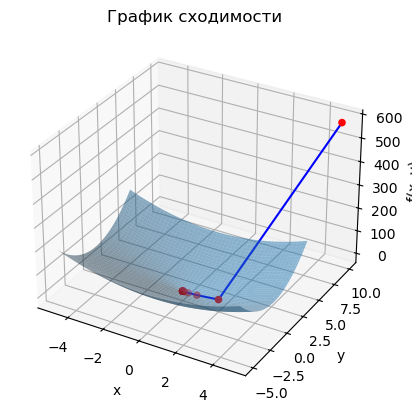

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_values = np.linspace(-5, 5, 100)
y_values = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = np.array([[f.subs({x: val_x, y: val_y}) for val_x in x_values] for val_y in y_values])
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.plot(res[:, 0], res[:, 1], res[:, 2], color='blue')
ax.scatter(res[:, 0], res[:, 1], res[:, 2], color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('График сходимости')
plt.show()